In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import numpy as np
import torch
import math

In [ ]:
TRAIN = True
# Number of epochs to train for.
EPOCHS = 5


In [ ]:
!pip install roboflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 4.3 MB/s 
     |████████████████████████████████| 178 kB 51.7 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 138 kB 56.8 MB/s 
     |████████████████████████████████| 596 kB 42.5 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.14-py3-none-any.whl size=24837 sha256=ddc8c32856a3a9a839ffaa8a147bbd5ec3cc9884685f63be78c93119b332d61e
  Stored in directory: /root/.cache/pip/wheels/c7/84/36/a6a32c749ead923690d15d20443fb53fa2fe10beaa408f371b
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=44ac8a842f662ff432aff1dca21a2dd80437693301b80a9b7a7fd7ac3aae60e4
  Stored in directory: /root/.cache/pip

In [ ]:


if not os.path.exists('train'):

    !curl -L "https://universe.roboflow.com/ds/VyLBaBjjMV?key=0Ww8krKSGI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    dirs = ['train', 'valid']
    for i, dir_name in enumerate(dirs):
        all_image_names = sorted(os.listdir(f"{dir_name}/images/"))
        for j, image_name in enumerate(all_image_names):

            if (j % 2) == 0:

                file_name = image_name.split('.jpg')[0]
                os.remove(f"{dir_name}/images/{image_name}")
                os.remove(f"{dir_name}/labels/{file_name}.txt")




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0     28      0  0:00:32  0:00:32 --:--:--   235
100 35.6M  100 35.6M    0     0  1083k      0  0:00:33  0:00:33 --:--:-- 26.5M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/dataset2_INRIA_Person_Train_crop001001_jpg.rf.6cb54f7c6958b703765f7d56ede52f3b.jpg  
 extracting: train/images/dataset2_INRIA_Person_Train_crop001002_jpg.rf.09825d3af8e65e71271eb74cc12f8ec9.jpg  
 extracting: train/images/dataset2_INRIA_Person_Train_crop001003_jpg.rf.ef266ca80f13dbd56f94b64b16002712.jpg  
 extracting: train/images/dataset2_INRIA_Person_Train_crop001004_jpg.rf.3b9ec6f69bd7d4eac865259fbc2718f6.jpg  
 extracting: train/images/dataset2_INRIA_Person_Train_cr

In [ ]:
train:'/content/train/images'
val:'/content/valid/images'
nc: 1
names: ['people']


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12576, done.
remote: Total 12576 (delta 0), reused 0 (delta 0), pack-reused 12576
Receiving objects: 100% (12576/12576), 12.47 MiB | 21.53 MiB/s, done.
Resolving deltas: 100% (8621/8621), done.


In [ ]:
cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
RES_DIR = '/content/result'

!python train.py --data ../data.yaml --weights yolov5s.pt \
    --img 640 --epochs {EPOCHS} --batch-size 16 --name {RES_DIR}


train: weights=yolov5s.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=/content/result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-379-gf5335f2 Python-3.7.13 torch-1.12.0+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0,

In [ ]:
# Function to show validation predictions saved during training.
def show_valid_results(RES_DIR):
    !ls {'/content/result2'}
    EXP_PATH = f"{'/content/result2'}"
    validation_pred_images = glob.glob(f"{EXP_PATH}/*_labels.jpg")
    print(validation_pred_images)
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()


confusion_matrix.png				   R_curve.png
events.out.tfevents.1660027072.f6fa9adaf9ef.936.0  results.csv
F1_curve.png					   results.png
hyp.yaml					   train_batch0.jpg
labels_correlogram.jpg				   train_batch1.jpg
labels.jpg					   train_batch2.jpg
opt.yaml					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   weights
['/content/result2/val_batch0_labels.jpg']


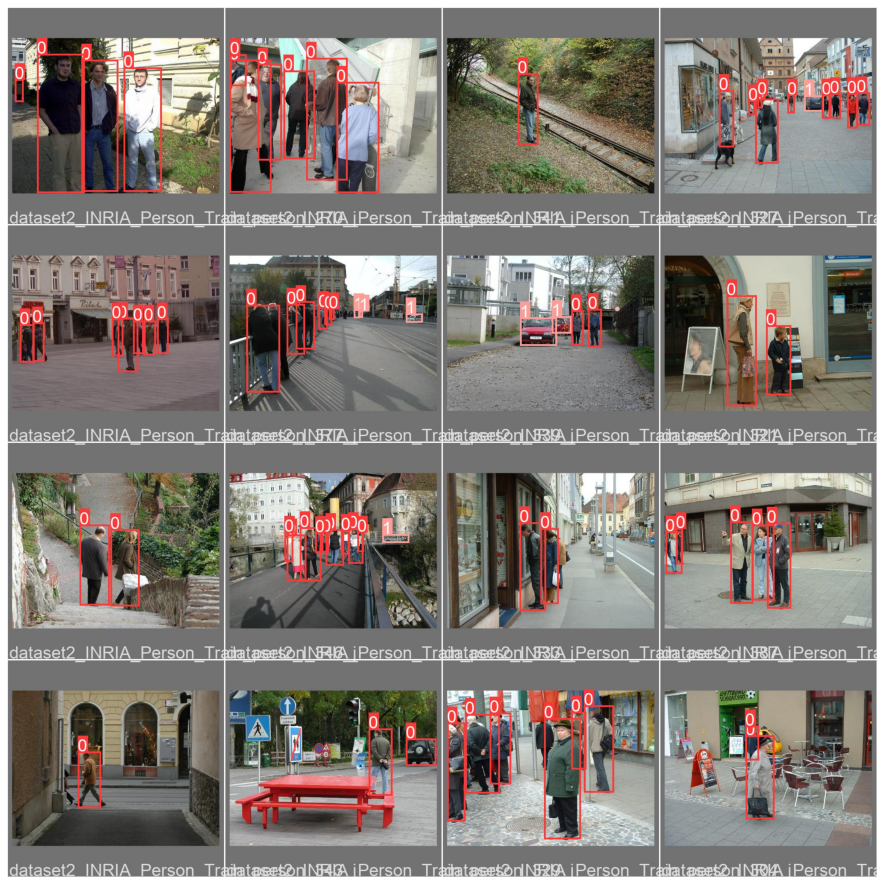

In [ ]:
show_valid_results(RES_DIR)

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/yolov5s.pt --source /content/valid/images/dataset2_INRIA_Person_Train_person_414_jpg.rf.722775eaabcfa9472051527e74ada275.jpg --name /content/output

detect: weights=['/content/yolov5/yolov5s.pt'], source=/content/valid/images/dataset2_INRIA_Person_Train_person_414_jpg.rf.722775eaabcfa9472051527e74ada275.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=/content/output, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-379-gf5335f2 Python-3.7.13 torch-1.12.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/valid/images/dataset2_INRIA_Person_Train_person_414_jpg.rf.722775eaabcfa9472051527e74ada275.jpg: 480x640 4 persons, 1 cat, 1 dog, 1 umbrella, 1 skateboard, Done. (0.390s)
Speed: 7.0ms pre-process, 389.6ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to /con

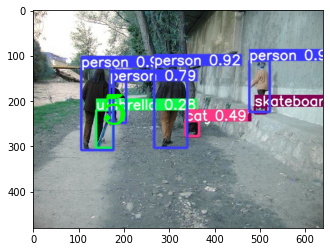

In [ ]:
counts='5'
image = cv2.imread("/content/output/dataset2_INRIA_Person_Train_person_414_jpg.rf.722775eaabcfa9472051527e74ada275.jpg")
cv2.putText(img=image, text=counts, org=(150, 250), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(0, 255, 0),thickness=3)

plt.imshow(image)
#plt.show()

In [ ]:
#https://github.com/ultralytics/yolov5/issues/2922
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/yolov5/yolov5s.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-9 Python-3.7.13 torch-1.12.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
#https://github.com/PaulinoMoskwa/Real-Time-Social-Distancing/blob/master/yolov5%20-%20part%202%20-%20Real-Time%20Social%20Distancing%20Detector%20and%20People%20Counter.ipynb
import cv2
from google.colab.patches import cv2_imshow
# Display settings
red   = (0,0,255)
green = (0,255,0)
blue  = (255,0,0)
black = (0,0,0)
white = (255, 255, 255)
average_box_height = 65
average_human_height = 170 #cm
minimal_distance_in_reality = 130 #cm
minimal_distance_between_points = (average_box_height * minimal_distance_in_reality)/average_human_height



# Geometric figures settings
thickness = 3
circle_radius = 6
fill = -1 # to fill the geometric figure

# Text settings
text_thickness = 1
text_size = 0.4
title_thickness = 2
title_size = 1
title = 'Real-time social distancing detection system'
font = cv2.FONT_HERSHEY_SIMPLEX # or cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture('/content/people.mp4')

while cap.isOpened():
    
    ret, frame = cap.read()
    
    if ret == True:

        # Predictions
        results = model(frame)

        # We extract the needed informations: xyxy, xywh
        predictions_xyxy = results.pandas().xyxy[0]
        predictions_xywh = results.pandas().xywh[0]

        # Let us consider only the 'person' label
        predictions_xyxy = predictions_xyxy[predictions_xyxy['name']=='person']
        predictions_xywh = predictions_xywh[predictions_xywh['name']=='person']

        #  Let's adjust the indeces (they might be not good since we considered just the 'person' label)
        predictions_xyxy.index = range(len(predictions_xyxy))
        predictions_xywh.index = range(len(predictions_xywh))

        # In this vector we will save (with 1's) the elements for which we want to make red boxes
        colori_box = [0] * len(predictions_xyxy)
        
        # For every person in the frame:
        for n in range(len(predictions_xyxy)):

                # n-th person's box center coordinates
                x_center = int(predictions_xywh['xcenter'][n])
                y_center = int(predictions_xywh['ycenter'][n])

                # For each person, we create a vector of distances w.r.t. all other people
                # e.g. for person number 0, two vectors will be created:
                #           distances = [5, 5, 2]
                #           distances_indeces = [1, 2, 3]
                #      which means that the person closest to person 0 is person 3

                distances = []
                distances_indeces = []

                for m in range(len(predictions_xyxy)):
                    if m != n:
                        x_center_m = int(predictions_xywh['xcenter'][m])
                        y_center_m = int(predictions_xywh['ycenter'][m])
                        centers_distance = (np.linalg.norm(x_center- y_center),np.linalg.norm (x_center_m - y_center_m))
                        distances.append(centers_distance)
                        distances_indeces.append(m)

                # Calculate now the minimum distance (in the above example is 2)
                #minimal_distance = np.min(distances)
                # and the index of the minimum distance element (in the example above is 3)
                #minimal_distance_element = distances_indeces[np.argmin(distances)]

                # If the two people (the two centers) are too close then both will be assigned flags = 1 in 'colors_box'
                '''
                if minimal_distance < minimal_distance_between_points:
                    if colori_box[n] == 0:
                        colori_box[n] = 1
                    if colori_box[minimal_distance_element] == 0:
                        colori_box[minimal_distance_element] = 1
                '''

        # Once defined the vector 'colors_box', let's print
        for n in range(len(predictions_xyxy)):
            x_min = int(predictions_xyxy['xmin'][n])
            y_min = int(predictions_xyxy['ymin'][n])
            x_max = int(predictions_xyxy['xmax'][n])
            y_max = int(predictions_xyxy['ymax'][n])

            if colori_box[n] == 1:
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), red, thickness);
                cv2.putText(frame, 'Person', (x_min-3, y_min-5), font, text_size, red, text_thickness);
            else:
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), green, thickness);
                cv2.putText(frame, 'Person', (x_min-3, y_min-5), font, text_size, green, text_thickness);

            # Also, we always print the center of the box in blue
            #x_center = int(predictions_xywh['xcenter'][n])
            #y_center = int(predictions_xywh['ycenter'][n])
            #cv2.circle(frame, (x_center, y_center), circle_radius, blue, fill)

        # People counter
        people_counter = 'Number of people ' + str(len(predictions_xyxy))
        cv2.putText(frame, people_counter, (50,50), font, title_size, white, title_thickness);

        # Plot all
        cv2_imshow(frame)
        #plt.savefig(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
#https://github.com/PaulinoMoskwa/Real-Time-Social-Distancing/blob/master/yolov5%20-%20part%202%20-%20Real-Time%20Social%20Distancing%20Detector%20and%20People%20Counter.ipynb
import cv2
from google.colab.patches import cv2_imshow
# Display settings
red   = (0,0,255)
green = (0,255,0)
blue  = (255,0,0)
black = (0,0,0)
white = (255, 255, 255)
average_box_height = 65
average_human_height = 170 #cm
minimal_distance_in_reality = 130 #cm
minimal_distance_between_points = (average_box_height * minimal_distance_in_reality)/average_human_height


# Geometric figures settings
thickness = 3
circle_radius = 6
fill = -1 # to fill the geometric figure

# Text settings
text_thickness = 1
text_size = 0.4
title_thickness = 2
title_size = 1
title = 'Real-time social distancing detection system'
font = cv2.FONT_HERSHEY_SIMPLEX # or cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture('/content/people.mp4')
#directory='/content/drive/MyDrive/People Counting pics'
frames=[]
while cap.isOpened():
    
    ret, frame = cap.read()
    
    if ret == True:
        '''img=cv2.imread(frame+'jpg')
        height,width,layers=img.shape
        size=(width,height)'''
        # Predictions
        results = model(frame)

        # We extract the needed informations: xyxy, xywh
        predictions_xyxy = results.pandas().xyxy[0]
        predictions_xywh = results.pandas().xywh[0]

        # Let us consider only the 'person' label
        predictions_xyxy = predictions_xyxy[predictions_xyxy['name']=='person']
        predictions_xywh = predictions_xywh[predictions_xywh['name']=='person']

        #  Let's adjust the indeces (they might be not good since we considered just the 'person' label)
        predictions_xyxy.index = range(len(predictions_xyxy))
        predictions_xywh.index = range(len(predictions_xywh))

        # In this vector we will save (with 1's) the elements for which we want to make red boxes
        colori_box = [0] * len(predictions_xyxy)
        
        # For every person in the frame:
        for n in range(len(predictions_xyxy)):

                # n-th person's box center coordinates
                x_center = int(predictions_xywh['xcenter'][n])
                y_center = int(predictions_xywh['ycenter'][n])

                # For each person, we create a vector of distances w.r.t. all other people
                # e.g. for person number 0, two vectors will be created:
                #           distances = [5, 5, 2]
                #           distances_indeces = [1, 2, 3]
                #      which means that the person closest to person 0 is person 3

                distances = []
                distances_indeces = []

                for m in range(len(predictions_xyxy)):
                    if m != n:
                        x_center_m = int(predictions_xywh['xcenter'][m])
                        y_center_m = int(predictions_xywh['ycenter'][m])
                        centers_distance = (np.linalg.norm(x_center- y_center),np.linalg.norm (x_center_m - y_center_m))
                        distances.append(centers_distance)
                        distances_indeces.append(m)

                # Calculate now the minimum distance (in the above example is 2)
                #minimal_distance = np.min(distances)
                # and the index of the minimum distance element (in the example above is 3)
                #minimal_distance_element = distances_indeces[np.argmin(distances)]

                # If the two people (the two centers) are too close then both will be assigned flags = 1 in 'colors_box'
                '''
                if minimal_distance < minimal_distance_between_points:
                    if colori_box[n] == 0:
                        colori_box[n] = 1
                    if colori_box[minimal_distance_element] == 0:
                        colori_box[minimal_distance_element] = 1
                '''

        # Once defined the vector 'colors_box', let's print
        for n in range(len(predictions_xyxy)):
            x_min = int(predictions_xyxy['xmin'][n])
            y_min = int(predictions_xyxy['ymin'][n])
            x_max = int(predictions_xyxy['xmax'][n])
            y_max = int(predictions_xyxy['ymax'][n])

            if colori_box[n] == 1:
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), red, thickness);
                cv2.putText(frame, 'Person', (x_min-3, y_min-5), font, text_size, red, text_thickness);
            else:
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), green, thickness);
                cv2.putText(frame, 'Person', (x_min-3, y_min-5), font, text_size, green, text_thickness);

            # Also, we always print the center of the box in blue
            #x_center = int(predictions_xywh['xcenter'][n])
            #y_center = int(predictions_xywh['ycenter'][n])
            #cv2.circle(frame, (x_center, y_center), circle_radius, blue, fill)

        # People counter
        people_counter = 'Number of people ' + str(len(predictions_xyxy))
        cv2.putText(frame, people_counter, (50,50), font, title_size, white, title_thickness);

        # Plot all
        #cv2_imshow(frame)
        #plt.savefig(frame)
        
        #video 
        #cv2.imwrite(os.path.join(directory , 'Frame'+str(i)+'.jpg'), frame)
       # out=cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'),15,size)
       # out.write(img)
        frames.append(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

cap.release()
#out.release()
cv2.destroyAllWindows()

In [ ]:
directory='/content/drive/MyDrive/People Counting pics'
for i in range(len(frames)):
  cv2.imwrite(os.path.join(directory , 'Frame'+str(i)+'.jpg'), frames[i])

In [ ]:
img_array=[]
for filename in glob.glob('/content/drive/MyDrive/People Counting pics/*.jpg'):
  img=cv2.imread(filename)
  height,width,layers=img.shape
  size=(width,height)
  img_array.append(img)
out=cv2.VideoWriter('/content/drive/MyDrive/People_Counting_Video/people_counting_video.mp4',
                    cv2.VideoWriter_fourcc(*'DIVX'),15,size)
for i in range(len(img_array)):
  out.write(img_array[i])
out.release()